In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [2]:
#ファイルの読み込み
data=pd.read_csv('data_datetime.csv',parse_dates=[0])
data2=data
#factor1がunspecifiedな行を削除
data=data[data['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#年ごとにデータを格納
data_2017=data[data['DATETIME'].dt.year==2017]
data_2016=data[data['DATETIME'].dt.year==2016]
data_2015=data[data['DATETIME'].dt.year==2015]
data_2014=data[data['DATETIME'].dt.year==2014]
data_2013=data[data['DATETIME'].dt.year==2013]
data_2012=data[data['DATETIME'].dt.year==2012]
data_AllMonth=data[(data['DATETIME'].dt.year==2013)|\
                  (data['DATETIME'].dt.year==2014)|\
                  (data['DATETIME'].dt.year==2015)|\
                  (data['DATETIME'].dt.year==2016)]
data2_AllMonth=data2[(data2['DATETIME'].dt.year==2013)|\
                  (data2['DATETIME'].dt.year==2014)|\
                  (data2['DATETIME'].dt.year==2015)|\
                  (data2['DATETIME'].dt.year==2016)]

In [4]:
data_month1=data_AllMonth[data_AllMonth['DATETIME'].dt.month==1]
data_month2=data_AllMonth[data_AllMonth['DATETIME'].dt.month==2]
data_month3=data_AllMonth[data_AllMonth['DATETIME'].dt.month==3]
data_month4=data_AllMonth[data_AllMonth['DATETIME'].dt.month==4]
data_month5=data_AllMonth[data_AllMonth['DATETIME'].dt.month==5]
data_month6=data_AllMonth[data_AllMonth['DATETIME'].dt.month==6]
data_month7=data_AllMonth[data_AllMonth['DATETIME'].dt.month==7]
data_month8=data_AllMonth[data_AllMonth['DATETIME'].dt.month==8]
data_month9=data_AllMonth[data_AllMonth['DATETIME'].dt.month==9]
data_month10=data_AllMonth[data_AllMonth['DATETIME'].dt.month==10]
data_month11=data_AllMonth[data_AllMonth['DATETIME'].dt.month==11]
data_month12=data_AllMonth[data_AllMonth['DATETIME'].dt.month==12]

## contributing factorについて、上位20以外をothersでまとめる

In [ ]:
list_Cont=list((data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index)[:20])
list_Street=list((data['ON STREET NAME'].value_counts().index)[:1000])

In [12]:
data4=data
data4['hour']=data['DATETIME'].dt.hour
data4['month']=data['DATETIME'].dt.month
data4['weekday']=data['DATETIME'].dt.weekday
data4['CONTRIBUTING FACTOR']=data4['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: x if x in list_Cont else 'Ohters')
data4['VEHICLE TYPE']=data4['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [8]:
data4['CONTRIBUTING FACTOR']

0                      Turning Improperly
1                                  Ohters
2                   Following Too Closely
3                                  Ohters
6          Driver Inattention/Distraction
7                    Unsafe Lane Changing
8                   Following Too Closely
9          Driver Inattention/Distraction
10                       Backing Unsafely
11         Passing or Lane Usage Improper
12                    Alcohol Involvement
13         Passing or Lane Usage Improper
16                                 Ohters
17                     Turning Improperly
18         Driver Inattention/Distraction
19         Driver Inattention/Distraction
21         Passing or Lane Usage Improper
23            Traffic Control Disregarded
25         Driver Inattention/Distraction
26                  Following Too Closely
27         Driver Inattention/Distraction
28                  Following Too Closely
29                                 Ohters
30         Driver Inattention/Dist

In [9]:
label_cont=data4['CONTRIBUTING FACTOR'].value_counts().sort_values(ascending=False).index

In [15]:
label_cont

Index(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Fatigued/Drowsy', 'Ohters', 'Backing Unsafely', 'Other Vehicular',
       'Turning Improperly', 'Following Too Closely', 'Lost Consciousness',
       'Prescription Medication', 'Traffic Control Disregarded',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Pavement Slippery', 'Outside Car Distraction', 'Unsafe Lane Changing',
       'Alcohol Involvement', 'Physical Disability', 'Oversized Vehicle',
       'Reaction to Other Uninvolved Vehicle', 'View Obstructed/Limited'],
      dtype='object')

In [113]:
Cont_sort

,CONTRIBUTING FACTOR
Driver Inattention/Distraction,162919
Failure to Yield Right-of-Way,52938
Fatigued/Drowsy,48441
Ohters,43652
Backing Unsafely,35222
Other Vehicular,34447
Turning Improperly,27856
Following Too Closely,25859
Lost Consciousness,20220
Prescription Medication,15900


(-2.202, 2.220, -2.204, 2.200)

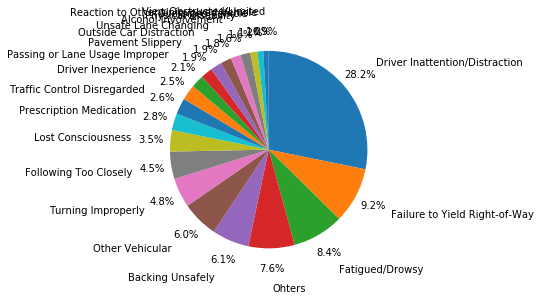

In [126]:
#外側円：原因ごとの事故の地区分布
Cont=pd.DataFrame(data4['CONTRIBUTING FACTOR'].value_counts().sort_index())
Cont_sort=Cont.sort_values('CONTRIBUTING FACTOR', ascending=False)
plt.pie(Cont_sort,labels=label_cont,counterclock=False,radius=2.0, labeldistance=1.4,startangle=90,autopct="%1.1f%%",pctdistance=1.2)
plt.axis('equal')

## DATE,TIMEカラムを統合したDATETIMEカラムのファイル作成

In [80]:
#DATE,TIMEカラムの削除
drop_col = ['DATE', 'TIME']
data_dummy3.drop(drop_col, axis=1)

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2017-10-20 00:00:00,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,NaN,0,...,Unspecified,NaN,NaN,NaN,3774810,TK,PASSENGER VEHICLE,NaN,NaN,NaN
1,2017-10-20 00:00:00,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,920 EAST 173 STREET,0,...,Unspecified,NaN,NaN,NaN,3773847,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2,2017-10-20 00:00:00,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,NaN,0,...,Unspecified,NaN,NaN,NaN,3773278,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,2017-10-20 00:00:00,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,NaN,0,...,Unspecified,NaN,NaN,NaN,3773961,BICYCLE,TAXI,NaN,NaN,NaN
4,2017-10-20 00:00:00,QUEENS,11355,40.760700,-73.820970,"(40.7607, -73.82097)",NaN,NaN,144-67 41 AVENUE,0,...,NaN,NaN,NaN,NaN,3773570,TAXI,NaN,NaN,NaN,NaN
5,2017-10-20 00:00:00,QUEENS,11375,NaN,NaN,NaN,63 drive,102 street,NaN,0,...,NaN,NaN,NaN,NaN,3773574,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
6,2017-10-20 00:00:00,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,NaN,0,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,3773456,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
7,2017-10-20 00:00:00,NaN,NaN,40.827755,-73.911700,"(40.827755, -73.9117)",EAST 165 STREET,NaN,NaN,0,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3773842,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
8,2017-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,COLLEGE POINT BLVD,NaN,0,...,Unspecified,Unspecified,NaN,NaN,3773389,SPORT UTILITY / STATION WAGON,TK,NaN,NaN,NaN
9,2017-10-20 00:00:00,NaN,NaN,40.667072,-73.834465,"(40.667072, -73.834465)",NORTH CONDUIT AVENUE,NaN,NaN,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,3773333,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN


## 事故原因について、決定木分析

1. Failure to Yield Right-of-Way,Turning Improperly,Unsafe Lane ChangingはStreetに相関がある？
2. Driver Inattention/Distraction,Lost Consciousnessは時間帯が因子である？

### Driver Inattention/Distractionについて、決定木分析  
1. 'CONTRIBUTING FACTOR VEHICLE 1'のflag立て
2. 'weekday/weekend''時間帯''season'のflag立て
3. 

#### 1.'CONTRIBUTING FACTOR VEHICLE 1'のflag立て

In [8]:
dt_analysis = data
dt_analysis['week']=dt_analysis['DATETIME'].dt.weekday
dt_analysis['hour']=dt_analysis['DATETIME'].dt.hour
dt_analysis['month']=dt_analysis['DATETIME'].dt.month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [22]:
#平日なら0,休日なら1
dt_analysis["weekday_holiday"]=dt_analysis['week'].apply( lambda x: 1 if x==5 or 6 else 0 )

In [23]:
#フラグ立て
dt_analysis["inattention"]=dt_analysis['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: 1 if x=='Driver Inattention/Distraction' else 0 )

In [24]:
#factor1がunspecifiedな行を削除
dt_analysis_drop=dt_analysis[dt_analysis['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']

In [25]:
dt_analysis_drop.count()

DATETIME                         577594
BOROUGH                          395673
ZIP CODE                         395625
LATITUDE                         478986
LONGITUDE                        478986
LOCATION                         478986
ON STREET NAME                   446538
CROSS STREET NAME                413040
OFF STREET NAME                   67082
NUMBER OF PERSONS INJURED        577594
NUMBER OF PERSONS KILLED         577594
NUMBER OF PEDESTRIANS INJURED    577594
NUMBER OF PEDESTRIANS KILLED     577594
NUMBER OF CYCLIST INJURED        577594
NUMBER OF CYCLIST KILLED         577594
NUMBER OF MOTORIST INJURED       577594
NUMBER OF MOTORIST KILLED        577594
CONTRIBUTING FACTOR VEHICLE 1    572666
CONTRIBUTING FACTOR VEHICLE 2    516879
CONTRIBUTING FACTOR VEHICLE 3     42642
CONTRIBUTING FACTOR VEHICLE 4      9474
CONTRIBUTING FACTOR VEHICLE 5      2365
UNIQUE KEY                       577594
VEHICLE TYPE CODE 1              572412
VEHICLE TYPE CODE 2              488387


In [31]:
dt_analysis.head(50)

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,weekday_holiday,hour,month,inattention,week
0,2017-10-20 00:00:00,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,NaN,0,...,TK,PASSENGER VEHICLE,NaN,NaN,NaN,1,0,10,0,4
1,2017-10-20 00:00:00,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,920 EAST 173 STREET,0,...,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1,0,10,0,4
2,2017-10-20 00:00:00,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,NaN,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1,0,10,0,4
3,2017-10-20 00:00:00,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,NaN,0,...,BICYCLE,TAXI,NaN,NaN,NaN,1,0,10,0,4
4,2017-10-20 00:00:00,QUEENS,11355,40.760700,-73.820970,"(40.7607, -73.82097)",NaN,NaN,144-67 41 AVENUE,0,...,TAXI,NaN,NaN,NaN,NaN,1,0,10,0,4
5,2017-10-20 00:00:00,QUEENS,11375,NaN,NaN,NaN,63 drive,102 street,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1,0,10,0,4
6,2017-10-20 00:00:00,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,NaN,0,...,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,1,0,10,1,4
7,2017-10-20 00:00:00,NaN,NaN,40.827755,-73.911700,"(40.827755, -73.9117)",EAST 165 STREET,NaN,NaN,0,...,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,1,0,10,0,4
8,2017-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,COLLEGE POINT BLVD,NaN,0,...,SPORT UTILITY / STATION WAGON,TK,NaN,NaN,NaN,1,0,10,0,4
9,2017-10-20 00:00:00,NaN,NaN,40.667072,-73.834465,"(40.667072, -73.834465)",NORTH CONDUIT AVENUE,NaN,NaN,0,...,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN,1,0,10,1,4


#### 決定木のパラメータ代入  
※決定木の学習を行う際に標準化は不要

In [13]:
dt_analysis_dummy=pd.get_dummies(dt_analysis_drop[['weekday_holiday','hour','month']])

In [14]:
dt_analysis_dummy["inattention"]=dt_analysis['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: 1 if x=='Driver Inattention/Distraction' else 0 )

In [15]:
# データの分類
from sklearn.model_selection import train_test_split
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 説明変数と目的変数
X = dt_analysis_dummy.drop("inattention", axis=1)
Y = dt_analysis_dummy['inattention']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=50)

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))

train: DecisionTreeClassifier 0.718385484597
test: DecisionTreeClassifier 0.716583909861


In [31]:
X.loc[1]

weekday_holiday     1
hour                0
month              10
Name: 1, dtype: int64

In [12]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(tree_model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

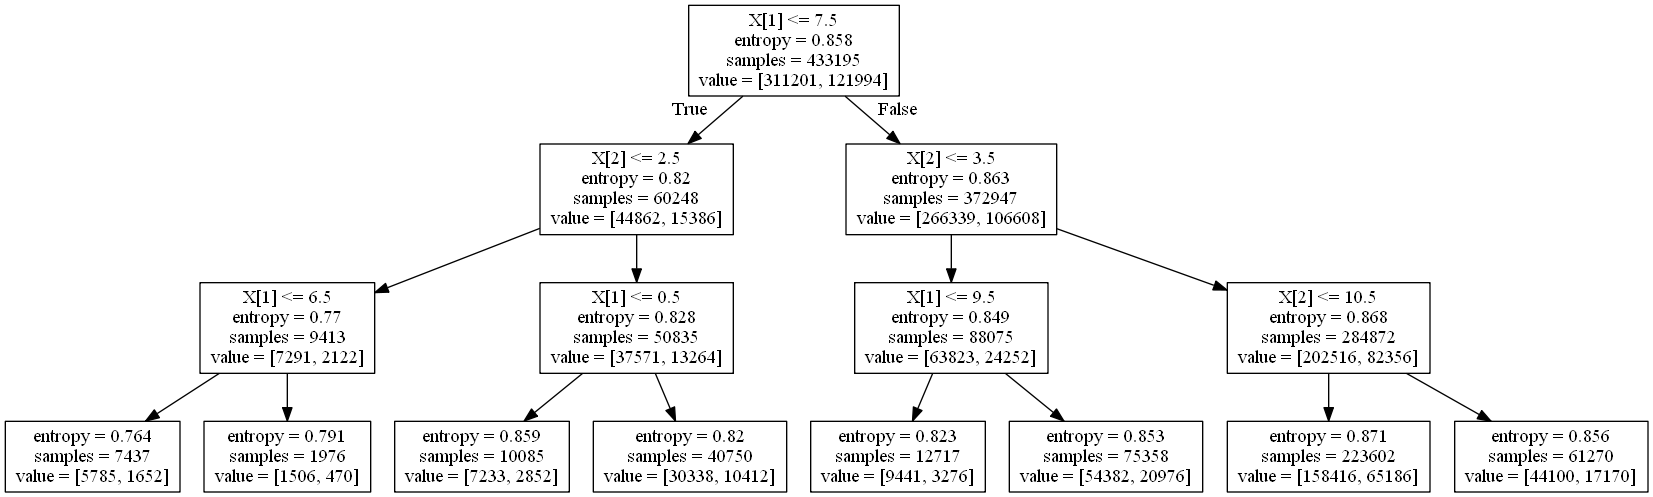

In [13]:
Image(graph.create_png())  

X[1]:時間帯、X[2]:月  


# やること  
1. 事故原因、streetの相関

In [145]:
Borough_Cont_Factor=data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['CONTRIBUTING FACTOR VEHICLE 1'].count()

In [146]:
Borough_Cont_Factor

CONTRIBUTING FACTOR VEHICLE 1
Accelerator Defective                                       495
Aggressive Driving/Road Rage                               3664
Alcohol Involvement                                        9375
Animals Action                                              627
Backing Unsafely                                          35222
Brakes Defective                                           2986
Cell Phone (hand-held)                                      175
Cell Phone (hands-free)                                     218
Driver Inattention/Distraction                           162919
Driver Inexperience                                       14702
Driverless/Runaway Vehicle                                  294
Drugs (Illegal)                                             578
Failure to Keep Right                                      2092
Failure to Yield Right-of-Way                             52938
Fatigued/Drowsy                                           48441
Fell Aslee

In [ ]:
data_frame1 = data_frame.groupby(['sex',''address]) #「性別」「住所」ごとに集約

In [17]:
Borough_Cont_Factor['DATE'].count()

BOROUGH        CONTRIBUTING FACTOR VEHICLE 1                        
BRONX          Accelerator Defective                                       65
               Aggressive Driving/Road Rage                               449
               Alcohol Involvement                                       1049
               Animals Action                                              54
               Backing Unsafely                                          3654
               Brakes Defective                                           360
               Cell Phone (hand-held)                                      17
               Cell Phone (hands-free)                                     14
               Driver Inattention/Distraction                           13626
               Driver Inexperience                                       1410
               Driverless/Runaway Vehicle                                  33
               Drugs (Illegal)                                           

In [18]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
#to convert into numbers
data_encode =data.apply(lambda x: label_encode.fit_transform(x))

TypeError: ("'>' not supported between instances of 'float' and 'str'", 'occurred at index BOROUGH')

In [ ]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy.head()

In [21]:
data_dummy= pd.get_dummies(data[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']])

In [111]:
data_dummy.head()

,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective,CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage,CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement,CONTRIBUTING FACTOR VEHICLE 1_Animals Action,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,...,VEHICLE TYPE CODE 1_UNKNOWN,VEHICLE TYPE CODE 1_UTILI,VEHICLE TYPE CODE 1_VAN,VEHICLE TYPE CODE 1_VN,VEHICLE TYPE CODE 1_ambul,VEHICLE TYPE CODE 1_bus,VEHICLE TYPE CODE 1_east,VEHICLE TYPE CODE 1_subn,VEHICLE TYPE CODE 1_unk,VEHICLE TYPE CODE 1_van
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 目的変数：flg立てをする
data_dummy["flg"] = data_dummy["classes"].map(lambda x: 1 if x =='p' else 0)

## 時系列ごとのデータ分析

## 日時ごとに事故数を抽出

- 時間帯ごと

In [7]:
per2 = data.TIME.dt.to_period("h")  # new way to get the same

AttributeError: 'DataFrame' object has no attribute 'TIME'

In [137]:
month_timespan=data.groupby(per2)['BOROUGH'].count()

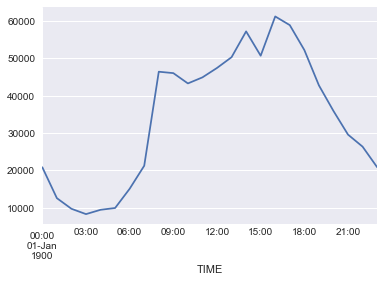

In [138]:
month_timespan.plot()

- 曜日ごと(0:月曜日～6:日曜日)

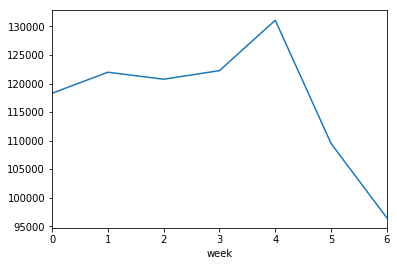

In [23]:
week_data=data.groupby(dt_analysis.week)['BOROUGH'].count()
week_data.plot()

休日は事故数が少ない。金曜日の事故数が特に多い。

- 月ごと

In [8]:
per = data.DATETIME.dt.to_period("M")  # new way to get the same
#data.groupby(per)['BOROUGH'].count()

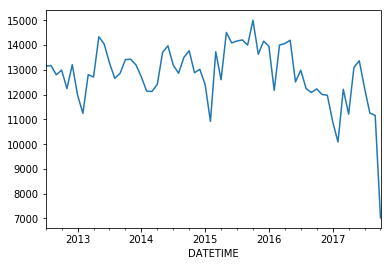

In [9]:
data_timespan=data.groupby(per)['BOROUGH'].count()
data_timespan.plot()

In [10]:
per_2012 = data_2012.DATETIME.dt.to_period("M")# new way to get the same
per_2013 = data_2013.DATETIME.dt.to_period("M")
per_2014 = data_2014.DATETIME.dt.to_period("M")
per_2015 = data_2015.DATETIME.dt.to_period("M")
per_2016 = data_2016.DATETIME.dt.to_period("M")
per_2017 = data_2017.DATETIME.dt.to_period("M")

In [13]:
month_2012=data.groupby(per_2012)['BOROUGH'].count()
month_2013=data.groupby(per_2013)['BOROUGH'].count()
month_2014=data.groupby(per_2014)['BOROUGH'].count()
month_2015=data.groupby(per_2015)['BOROUGH'].count()
month_2016=data.groupby(per_2016)['BOROUGH'].count()
month_2017=data.groupby(per_2017)['BOROUGH'].count()

In [14]:
month_2016

DATETIME
2016-01    7594
2016-02    6876
2016-03    9071
2016-04    8342
2016-05      29
2016-06      53
2016-07      90
2016-08     398
2016-09    6327
2016-10    8680
2016-11    8492
2016-12    8543
Freq: M, Name: BOROUGH, dtype: int64

- 各年の月ごと

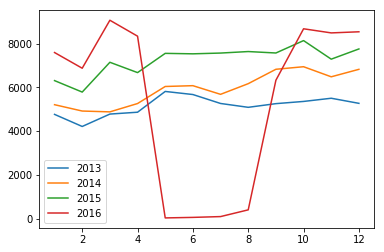

In [15]:
#unspecified含む事故数の分布
x=np.arange(1,13)
plt.plot(x,month_2013,label='2013')
plt.plot(x,month_2014,label='2014')
plt.plot(x,month_2015,label='2015')
plt.plot(x,month_2016,label='2016')
plt.legend()

- ２～３月にかけて上昇
- １０月に増

## 曜日ごとで事故原因・事故地区の変化を検証

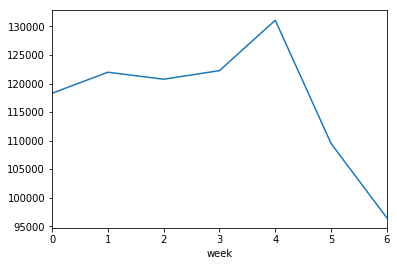

In [23]:
week_data=data.groupby(dt_analysis.week)['BOROUGH'].count()
week_data.plot()

## 事故原因ごとの地区分布

In [41]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sum()

572666

In [42]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           162919
Failure to Yield Right-of-Way                             52938
Fatigued/Drowsy                                           48441
Backing Unsafely                                          35222
Other Vehicular                                           34447
Turning Improperly                                        27856
Following Too Closely                                     25859
Lost Consciousness                                        20220
Prescription Medication                                   15900
Traffic Control Disregarded                               15154
Driver Inexperience                                       14702
Passing or Lane Usage Improper                            12118
Pavement Slippery                                         11124
Outside Car Distraction                                   10846
Unsafe Lane Changing                                      10194
Alcohol Involvement                     

In [22]:
p=pd.DataFrame(data['ON STREET NAME'].value_counts())
p.to_csv('a.csv')

In [14]:
a=pd.DataFrame(data['ON STREET NAME'].value_counts())
b_0=pd.DataFrame(data['ON STREET NAME'].value_counts())
b=b_0.sort_values('ON STREET NAME', ascending=True)

In [78]:
data['ON STREET NAME'].value_counts()

BROADWAY                            6236
ATLANTIC AVENUE                     5105
NORTHERN BOULEVARD                  4726
                                    4591
3 AVENUE                            4541
QUEENS BOULEVARD                    3976
2 AVENUE                            3376
FLATBUSH AVENUE                     3013
HYLAN BOULEVARD                     2743
5 AVENUE                            2685
JAMAICA AVENUE                      2548
BRUCKNER BOULEVARD                  2542
10 AVENUE                           2476
PARK AVENUE                         2388
CANAL STREET                        2357
LINDEN BOULEVARD                    2352
7 AVENUE                            2304
8 AVENUE                            2296
1 AVENUE                            2290
HILLSIDE AVENUE                     2086
WOODHAVEN BOULEVARD                 2031
9 AVENUE                            1934
METROPOLITAN AVENUE                 1886
JEROME AVENUE                       1872
11 AVENUE       

In [82]:
b1=b[:7740]['ON STREET NAME']
b2=b[7740:7840]['ON STREET NAME']

In [85]:
b1.sum()

287412

In [86]:
b2.sum()

159126

In [57]:
a.head(100) #上位70ストリートは事故原因既知の事故数が1000件以上

,ON STREET NAME
BROADWAY,6236
ATLANTIC AVENUE,5105
NORTHERN BOULEVARD,4726
,4591
3 AVENUE,4541
QUEENS BOULEVARD,3976
2 AVENUE,3376
FLATBUSH AVENUE,3013
HYLAN BOULEVARD,2743
5 AVENUE,2685


In [53]:
#全体の地区分布
Cont_Total_Street=data.dropna(subset=['ON STREET NAME'])['CONTRIBUTING FACTOR VEHICLE 1'].count()
Cont_Street=pd.DataFrame(data['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_Street_r=Cont_Street.div(Cont_Total_Street)

In [54]:
Cont_Street_sort10=Cont_Street.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_Street_sort10_r=Cont_Street_sort10.div(Cont_Total_Street)

([<matplotlib.patches.Wedge at 0x208a5c18>,
  <matplotlib.text.Text at 0x1c931048>])

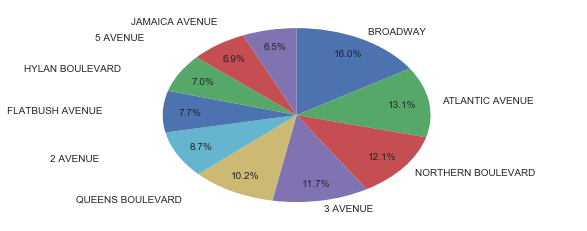

In [48]:
#外側円：原因ごとの事故の地区分布
label=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8)

In [52]:
data.count() #577594

DATETIME                         577594
BOROUGH                          395673
ZIP CODE                         395625
LATITUDE                         478986
LONGITUDE                        478986
LOCATION                         478986
ON STREET NAME                   446538
CROSS STREET NAME                413040
OFF STREET NAME                   67082
NUMBER OF PERSONS INJURED        577594
NUMBER OF PERSONS KILLED         577594
NUMBER OF PEDESTRIANS INJURED    577594
NUMBER OF PEDESTRIANS KILLED     577594
NUMBER OF CYCLIST INJURED        577594
NUMBER OF CYCLIST KILLED         577594
NUMBER OF MOTORIST INJURED       577594
NUMBER OF MOTORIST KILLED        577594
CONTRIBUTING FACTOR VEHICLE 1    572666
CONTRIBUTING FACTOR VEHICLE 2    516879
CONTRIBUTING FACTOR VEHICLE 3     42642
CONTRIBUTING FACTOR VEHICLE 4      9474
CONTRIBUTING FACTOR VEHICLE 5      2365
UNIQUE KEY                       577594
VEHICLE TYPE CODE 1              572412
VEHICLE TYPE CODE 2              488387


In [53]:
Street.count() #446538

DATETIME                         446538
BOROUGH                          356691
ZIP CODE                         356652
LATITUDE                         379377
LONGITUDE                        379377
LOCATION                         379377
ON STREET NAME                   446538
CROSS STREET NAME                413038
OFF STREET NAME                   18388
NUMBER OF PERSONS INJURED        446538
NUMBER OF PERSONS KILLED         446538
NUMBER OF PEDESTRIANS INJURED    446538
NUMBER OF PEDESTRIANS KILLED     446538
NUMBER OF CYCLIST INJURED        446538
NUMBER OF CYCLIST KILLED         446538
NUMBER OF MOTORIST INJURED       446538
NUMBER OF MOTORIST KILLED        446538
CONTRIBUTING FACTOR VEHICLE 1    442369
CONTRIBUTING FACTOR VEHICLE 2    398747
CONTRIBUTING FACTOR VEHICLE 3     27537
CONTRIBUTING FACTOR VEHICLE 4      6193
CONTRIBUTING FACTOR VEHICLE 5      1559
UNIQUE KEY                       446538
VEHICLE TYPE CODE 1              443182
VEHICLE TYPE CODE 2              381344


In [56]:
Street_a=Street[Street['ON STREET NAME'] !='                                ']
Street_a.count() #441947

DATETIME                         441947
BOROUGH                          353258
ZIP CODE                         353220
LATITUDE                         375558
LONGITUDE                        375558
LOCATION                         375558
ON STREET NAME                   441947
CROSS STREET NAME                408447
OFF STREET NAME                   13799
NUMBER OF PERSONS INJURED        441947
NUMBER OF PERSONS KILLED         441947
NUMBER OF PEDESTRIANS INJURED    441947
NUMBER OF PEDESTRIANS KILLED     441947
NUMBER OF CYCLIST INJURED        441947
NUMBER OF CYCLIST KILLED         441947
NUMBER OF MOTORIST INJURED       441947
NUMBER OF MOTORIST KILLED        441947
CONTRIBUTING FACTOR VEHICLE 1    438270
CONTRIBUTING FACTOR VEHICLE 2    394977
CONTRIBUTING FACTOR VEHICLE 3     27188
CONTRIBUTING FACTOR VEHICLE 4      6118
CONTRIBUTING FACTOR VEHICLE 5      1541
UNIQUE KEY                       441947
VEHICLE TYPE CODE 1              438638
VEHICLE TYPE CODE 2              377557


In [146]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S1=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Failure to Yield Right-of-Way']
Cont_S1=pd.DataFrame(Cont_S1['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S1_sort10=Cont_S1.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S1_sort10_r=Cont_S1_sort10.div(Cont_Total_Street)

([<matplotlib.patches.Wedge at 0x67ce76d8>,
  <matplotlib.text.Text at 0x67c41518>])

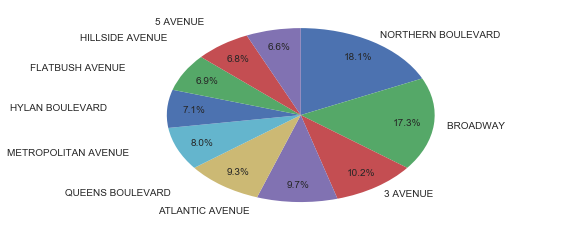

In [155]:
#外側円：原因ごとの事故の地区分布
label=Cont_S1_sort10_r.index
plt.pie(Cont_S1_sort10,labels=label,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8)

### Pavement Slippery

In [63]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S2=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery']
Cont_S2=pd.DataFrame(Cont_S2['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S2_sort10=Cont_S2.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S2_sort10_r=Cont_S2_sort10.div(Cont_Total_Street)

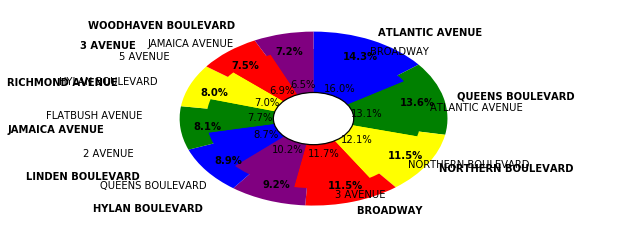

In [64]:
#外側円：原因ごとの事故の地区分布
#外側円：原因ごとの事故の地区分布
colors=["blue","green","yellow","red","purple"]
label1=Cont_S2_sort10_r.index
plt.pie(Cont_S2_sort10,labels=label1,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8,colors=colors,textprops={'color': "black", 'weight': "bold"})

#内側円：事故数全体の地区分布
label2=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label2,counterclock=False, startangle=90,autopct="%1.1f%%",radius=0.8,pctdistance=0.5,colors=colors)

# 中心 (0,0) に 40% の大きさで円を描画
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.axis('equal')


([<matplotlib.patches.Wedge at 0x67bc55c0>,
  <matplotlib.text.Text at 0x67b3f400>])

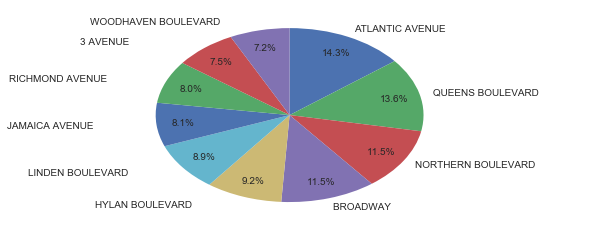

In [156]:
#外側円：原因ごとの事故の地区分布
label=Cont_S2_sort10_r.index
plt.pie(Cont_S2_sort10,labels=label,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8)

### Turning Improperly

In [55]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S3=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Turning Improperly']
Cont_S3=pd.DataFrame(Cont_S3['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S3_sort10=Cont_S3.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S3_sort10_r=Cont_S3_sort10.div(Cont_Total_Street)

In [57]:
Cont_S3_sort10
Cont_Total_Street

442369

In [40]:
St_10AVENUE=data[data['ON STREET NAME']=='10 AVENUE                       ']

In [51]:
St_10AVENUE_TI=St_10AVENUE[St_10AVENUE['CONTRIBUTING FACTOR VEHICLE 1']=='Turning Improperly']

In [54]:
St_10AVENUE_TI['CROSS STREET NAME'].value_counts()

WEST 30 STREET                      23
WEST 40 STREET                      22
WEST 34 STREET                      19
WEST 29 STREET                      14
WEST 39 STREET                      12
WEST 42 STREET                      12
WEST 41 STREET                      12
WEST 43 STREET                      12
WEST 36 STREET                      10
WEST 23 STREET                       9
WEST 37 STREET                       9
WEST 15 STREET                       8
WEST 38 STREET                       8
WEST 41 STREET                       7
WEST 39 STREET                       6
WEST 57 STREET                       6
WEST 45 STREET                       6
WEST 35 STREET                       6
WEST 20 STREET                       6
WEST 28 STREET                       6
WEST 25 STREET                       6
WEST 46 STREET                       5
WEST 31 STREET                       5
WEST 14 STREET                       5
WEST 24 STREET                       5
WEST 17 STREET           

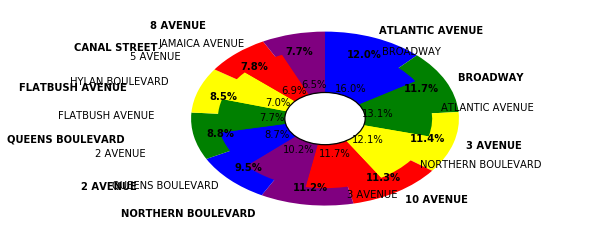

In [10]:
#外側円：原因ごとの事故の地区分布
#外側円：原因ごとの事故の地区分布
colors=["blue","green","yellow","red","purple"]
label1=Cont_S3_sort10_r.index
plt.pie(Cont_S3_sort10,labels=label1,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8,colors=colors,textprops={'color': "black", 'weight': "bold"})

#内側円：事故数全体の地区分布
label2=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label2,counterclock=False, startangle=90,autopct="%1.1f%%",radius=0.8,pctdistance=0.5,colors=colors)

# 中心 (0,0) に 40% の大きさで円を描画
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.axis('equal')


### Alcohol Involvement

In [12]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S4=Street[Street['CONTRIBUTING FACTOR VEHICLE 1']=='Alcohol Involvement']
Cont_S4=pd.DataFrame(Cont_S4['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S4_sort10=Cont_S4.sort_values('ON STREET NAME', ascending=False)[:10]
Cont_S4_sort10_r=Cont_S4_sort10.div(Cont_Total_Street)

In [32]:
Cont_S4_sort10

,ON STREET NAME
BROADWAY,97
ATLANTIC AVENUE,95
NORTHERN BOULEVARD,88
3 AVENUE,54
HYLAN BOULEVARD,50
EAST TREMONT AVENUE,48
QUEENS BOULEVARD,45
JEROME AVENUE,43
LINDEN BOULEVARD,41
PARK AVENUE,40


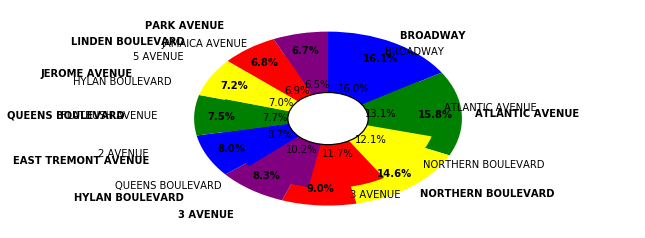

In [13]:
#外側円：原因ごとの事故の地区分布
#外側円：原因ごとの事故の地区分布
colors=["blue","green","yellow","red","purple"]
label1=Cont_S4_sort10_r.index
plt.pie(Cont_S4_sort10,labels=label1,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8,colors=colors,textprops={'color': "black", 'weight': "bold"})

#内側円：事故数全体の地区分布
label2=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label2,counterclock=False, startangle=90,autopct="%1.1f%%",radius=0.8,pctdistance=0.5,colors=colors)

# 中心 (0,0) に 40% の大きさで円を描画
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.axis('equal')


### Failure to yield right of way

In [57]:
Street=data.dropna(subset=['ON STREET NAME'])
Cont_S5=Street_a[Street_a['CONTRIBUTING FACTOR VEHICLE 1']=='Failure to Yield Right-of-Way']
Cont_S5=pd.DataFrame(Cont_S5['ON STREET NAME'].value_counts().sort_index())[1:]
Cont_S5_sort10=Cont_S5.sort_values('ON STREET NAME', ascending=False)[:10]

In [60]:
Cont_S5_sort10

,ON STREET NAME
NORTHERN BOULEVARD,709
BROADWAY,678
3 AVENUE,400
ATLANTIC AVENUE,381
QUEENS BOULEVARD,366
METROPOLITAN AVENUE,314
HYLAN BOULEVARD,277
FLATBUSH AVENUE,272
HILLSIDE AVENUE,265
5 AVENUE,259


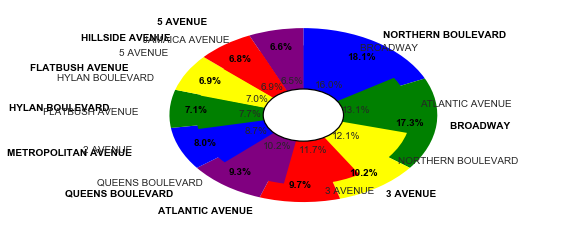

In [59]:
#外側円：原因ごとの事故の地区分布
#外側円：原因ごとの事故の地区分布
colors=["blue","green","yellow","red","purple"]
label1=Cont_S5_sort10_r.index
plt.pie(Cont_S5_sort10,labels=label1,counterclock=False, startangle=90,autopct="%1.1f%%",pctdistance=0.8,colors=colors,textprops={'color': "black", 'weight': "bold"})

#内側円：事故数全体の地区分布
label2=Cont_Street_sort10_r.index
plt.pie(Cont_Street_sort10,labels=label2,counterclock=False, startangle=90,autopct="%1.1f%%",radius=0.8,pctdistance=0.5,colors=colors)

# 中心 (0,0) に 40% の大きさで円を描画
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.axis('equal')


In [30]:
data_TREMONT=data[data['ON STREET NAME']=='EAST TREMONT AVENUE             ']

In [31]:
data_TREMONT['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           347
Failure to Yield Right-of-Way                            123
Other Vehicular                                           89
Fatigued/Drowsy                                           86
Backing Unsafely                                          72
Turning Improperly                                        71
Prescription Medication                                   68
Alcohol Involvement                                       48
Following Too Closely                                     46
Lost Consciousness                                        38
Outside Car Distraction                                   28
Traffic Control Disregarded                               28
Driver Inexperience                                       24
Pavement Slippery                                         21
Physical Disability                                       20
Unsafe Lane Changing                                      19
Passing or Lane Usage Im

In [98]:
St_Lind=data[data['ON STREET NAME']=='LINDEN BOULEVARD                ']

In [99]:
St_Lind_TI=St_Lind[St_Lind['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery']

In [102]:
St_Lind_TI['CROSS STREET NAME'].value_counts()

JUNIUS STREET                       2
EUCLID AVENUE                       2
KINGS HIGHWAY                       2
169 STREET                          2
FARMERS BOULEVARD                   2
ROCKAWAY AVENUE                     2
REMSEN AVENUE                       2
SOUTH CONDUIT AVENUE                1
JEROME STREET                       1
MALTA STREET                        1
CHURCH AVENUE                       1
232 STREET                          1
SUTPHIN BOULEVARD                   1
130 STREET                          1
SUTPHIN BOULEVARD                   1
EAST 40 STREET                      1
ALABAMA AVENUE                      1
CHURCH AVENUE                       1
EAST 92 STREET                      1
SPRINGFIELD BOULEVARD               1
CHESTER STREET                      1
PENNSYLVANIA AVENUE                 1
FOUNTAIN AVENUE                     1
POWELL STREET                       1
EAST 49 STREET                      1
ROCKAWAY AVENUE                     1
CROSSBAY BOU

In [61]:
data_Blank=data[data['ON STREET NAME']=='                                ']

In [62]:
data_Blank

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
335637,2016-04-02 10:10:00,NaN,NaN,NaN,NaN,NaN,,,,1,...,NaN,NaN,NaN,NaN,3428936,NaN,NaN,NaN,NaN,NaN
338100,2016-03-26 00:30:00,NaN,NaN,NaN,NaN,NaN,,,1619 MORRISON AVE,0,...,NaN,NaN,NaN,NaN,3411832,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
340961,2016-04-27 01:30:00,BROOKLYN,11233,40.676015,-73.916515,"(40.6760152, -73.9165154)",,,285 SARATOGA AVENUE,0,...,NaN,NaN,NaN,NaN,3432350,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
341140,2016-04-26 10:10:00,QUEENS,11364,40.746350,-73.766706,"(40.7463496, -73.7667057)",,,210-07 HORACE HARDING EXPRESSWAY,0,...,Turning Improperly,NaN,NaN,NaN,3427764,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),NaN,NaN,NaN
341148,2016-04-26 10:30:00,QUEENS,11379,40.714702,-73.886523,"(40.7147017, -73.8865232)",,,69-014 JUNIPER VALLEY ROAD,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,3423586,LARGE COM VEH(6 OR MORE TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
341164,2016-04-26 11:00:00,MANHATTAN,10011,40.744184,-73.993804,"(40.744184, -73.9938036)",,,152 WEST 24 STREET,2,...,Lost Consciousness,NaN,NaN,NaN,3407129,PASSENGER VEHICLE,AMBULANCE,NaN,NaN,NaN
341172,2016-04-26 11:30:00,QUEENS,11691,40.596579,-73.754179,"(40.596579, -73.7541794)",,,271 BEACH 20 STREET,0,...,Backing Unsafely,NaN,NaN,NaN,3435862,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
341175,2016-04-26 11:40:00,BRONX,10471,40.907077,-73.902149,"(40.9070772, -73.9021487)",,,5917 LIEBIG AVENUE,0,...,Backing Unsafely,NaN,NaN,NaN,3433687,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
341189,2016-04-26 12:00:00,QUEENS,11415,40.706265,-73.834639,"(40.7062646, -73.8346394)",,,83-30 118 STREET,0,...,Backing Unsafely,NaN,NaN,NaN,3422601,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
341200,2016-04-26 12:15:00,QUEENS,11412,40.698527,-73.762524,"(40.6985272, -73.7625237)",,,113-31 FARMERS BOULEVARD,0,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3428654,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [67]:
data_Richmond=data[data['ON STREET NAME']=='RICHMOND AVENUE                 ']

In [76]:
data[data['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery'].count()

DATETIME                         11124
BOROUGH                           7143
ZIP CODE                          7143
LATITUDE                          8984
LONGITUDE                         8984
LOCATION                          8984
ON STREET NAME                    8333
CROSS STREET NAME                 7931
OFF STREET NAME                    911
NUMBER OF PERSONS INJURED        11124
NUMBER OF PERSONS KILLED         11124
NUMBER OF PEDESTRIANS INJURED    11124
NUMBER OF PEDESTRIANS KILLED     11124
NUMBER OF CYCLIST INJURED        11124
NUMBER OF CYCLIST KILLED         11124
NUMBER OF MOTORIST INJURED       11124
NUMBER OF MOTORIST KILLED        11124
CONTRIBUTING FACTOR VEHICLE 1    11124
CONTRIBUTING FACTOR VEHICLE 2     8889
CONTRIBUTING FACTOR VEHICLE 3     1054
CONTRIBUTING FACTOR VEHICLE 4      251
CONTRIBUTING FACTOR VEHICLE 5       67
UNIQUE KEY                       11124
VEHICLE TYPE CODE 1              11075
VEHICLE TYPE CODE 2               8612
VEHICLE TYPE CODE 3      

In [77]:
data[data['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery']['ON STREET NAME'].value_counts().sum()

8333

In [68]:
data_Richmond[data_Richmond['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery'].count()

DATETIME                         56
BOROUGH                          26
ZIP CODE                         26
LATITUDE                         29
LONGITUDE                        29
LOCATION                         29
ON STREET NAME                   56
CROSS STREET NAME                54
OFF STREET NAME                   1
NUMBER OF PERSONS INJURED        56
NUMBER OF PERSONS KILLED         56
NUMBER OF PEDESTRIANS INJURED    56
NUMBER OF PEDESTRIANS KILLED     56
NUMBER OF CYCLIST INJURED        56
NUMBER OF CYCLIST KILLED         56
NUMBER OF MOTORIST INJURED       56
NUMBER OF MOTORIST KILLED        56
CONTRIBUTING FACTOR VEHICLE 1    56
CONTRIBUTING FACTOR VEHICLE 2    48
CONTRIBUTING FACTOR VEHICLE 3     6
CONTRIBUTING FACTOR VEHICLE 4     1
CONTRIBUTING FACTOR VEHICLE 5     0
UNIQUE KEY                       56
VEHICLE TYPE CODE 1              56
VEHICLE TYPE CODE 2              47
VEHICLE TYPE CODE 3               5
VEHICLE TYPE CODE 4               1
VEHICLE TYPE CODE 5         

In [191]:
data_Lind.groupby('CONTRIBUTING FACTOR VEHICLE 1').count().sort_ndex()

AttributeError: 'DataFrame' object has no attribute 'sort_ndex'

In [ ]:
data_Richmond=data[data['ON STREET NAME']=='RICHMOND AVENUE                 ']

## streetについてflag立て

上位100個のStreetのみ抽出

In [39]:
list_Street=list((data['ON STREET NAME'].value_counts().index)[:1000])

In [42]:
data4['STREET']=data4['ON STREET NAME'].apply( lambda x: x if x in list_Street else 'Ohters')

C:\Users\miyamoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data4['STREET'].value_counts()

Ohters                              208972
BROADWAY                              6236
ATLANTIC AVENUE                       5105
NORTHERN BOULEVARD                    4726
                                      4591
3 AVENUE                              4541
QUEENS BOULEVARD                      3976
2 AVENUE                              3376
FLATBUSH AVENUE                       3013
HYLAN BOULEVARD                       2743
5 AVENUE                              2685
JAMAICA AVENUE                        2548
BRUCKNER BOULEVARD                    2542
10 AVENUE                             2476
PARK AVENUE                           2388
CANAL STREET                          2357
LINDEN BOULEVARD                      2352
7 AVENUE                              2304
8 AVENUE                              2296
1 AVENUE                              2290
HILLSIDE AVENUE                       2086
WOODHAVEN BOULEVARD                   2031
9 AVENUE                              1934
METROPOLITA

In [9]:
Street=data.dropna(subset=['ON STREET NAME'])

In [29]:
Street=data.dropna(subset=['ON STREET NAME']).sort_values('ON STREET NAME', ascending=False)[:100]

In [31]:
Street.shape

(100, 28)

In [40]:
a=Street['ON STREET NAME'].value_counts().index

## ヒートマップ作成

In [17]:
data4['hour']=data['DATETIME'].dt.hour
data4['month']=data['DATETIME'].dt.month
data4['weekday']=data['DATETIME'].dt.weekday

C:\Users\miyamoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\miyamoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\miyamoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [127]:
#hour,monthで事故数カウント
data4.groupby('hour')['month'].count()

month=pd.DataFrame(index=[])
weekday=pd.DataFrame(index=[])
for i in range(24):
    #Series=data[data['hour']==i]['month'].value_counts().sort_index()
    month=month.append(data[data['hour']==i]['month'].value_counts().sort_index(),ignore_index = True)
    weekday=weekday.append(data[data['hour']==i]['weekday'].value_counts().sort_index(),ignore_index = True)

In [128]:
list_weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday.columns=list_weekday

In [129]:
week

NameError: name 'week' is not defined

AttributeError: 'DataFrame' object has no attribute 'fig'

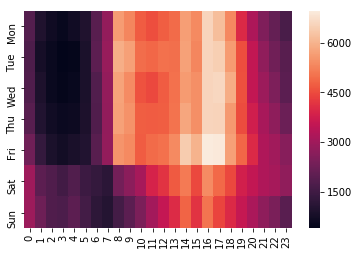

In [132]:
sns.heatmap(weekday.T)
g.fig.suptitle('THIS IS A TITLE, YOU BET')

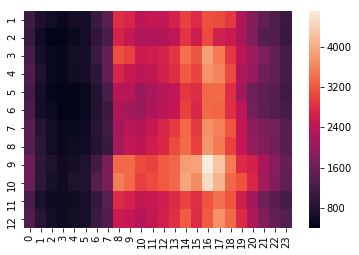

In [131]:
sns.heatmap(month.T)

In [ ]:
heatmap_sample['hour']

In [ ]:
sns.heatmap(pd.DataFrame(cluster_num_job_cross_tb.unstack(1)/cluster_num_cnt_tb,columns=["cl_nm"]).unstack())

## Drivers Inattentionについてクラスタリング

In [11]:
list_Vehicle=list((data['VEHICLE TYPE CODE 1'].value_counts().index)[:13])

In [25]:
list_Vehicle

['PASSENGER VEHICLE',
 'SPORT UTILITY / STATION WAGON',
 'TAXI',
 'VAN',
 'PICK-UP TRUCK',
 'OTHER',
 'LARGE COM VEH(6 OR MORE TIRES)',
 'UNKNOWN',
 'SMALL COM VEH(4 TIRES) ',
 'BUS',
 'LIVERY VEHICLE',
 'MOTORCYCLE',
 'BICYCLE']

In [26]:
data4['VEHICLE TYPE']=data4['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

C:\Users\miyamoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data4['VEHICLE TYPE'].value_counts()

PASSENGER VEHICLE                 306004
SPORT UTILITY / STATION WAGON     157744
TAXI                               28671
VAN                                13713
PICK-UP TRUCK                      11935
OTHER                               9716
LARGE COM VEH(6 OR MORE TIRES)      8422
UNKNOWN                             7540
SMALL COM VEH(4 TIRES)              7242
Ohters                              7132
BUS                                 6819
LIVERY VEHICLE                      5937
MOTORCYCLE                          3373
BICYCLE                             3346
Name: VEHICLE TYPE, dtype: int64

In [82]:
data4.head()

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,month,weekday,CONTRIBUTING FACTOR,VEHICLE TYPE
0,2017-10-20,BRONX,10454,40.809620,-73.928140,"(40.80962, -73.92814)",LINCOLN AVENUE,EAST 136 STREET,NaN,0,...,TK,PASSENGER VEHICLE,NaN,NaN,NaN,0,10,4,Turning Improperly,Ohters
1,2017-10-20,BRONX,10460,40.835648,-73.888620,"(40.835648, -73.88862)",NaN,NaN,920 EAST 173 STREET,0,...,BU,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,10,4,Ohters,Ohters
2,2017-10-20,BRONX,10466,40.893390,-73.857376,"(40.89339, -73.857376)",EAST 233 STREET,WHITE PLAINS ROAD,NaN,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,0,10,4,Following Too Closely,PASSENGER VEHICLE
3,2017-10-20,MANHATTAN,10011,40.740440,-74.002030,"(40.74044, -74.00203)",WEST 15 STREET,8 AVENUE,NaN,0,...,BICYCLE,TAXI,NaN,NaN,NaN,0,10,4,Ohters,BICYCLE
6,2017-10-20,QUEENS,11432,40.714610,-73.802550,"(40.71461, -73.80255)",164 STREET,84 ROAD,NaN,0,...,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0,10,4,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON


In [14]:
DI=data4[data4['CONTRIBUTING FACTOR VEHICLE 1']=='Driver Inattention/Distraction']

In [65]:
DI['hour'].value_counts()
DI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162919 entries, 6 to 1137845
Data columns (total 33 columns):
DATETIME                         162919 non-null datetime64[ns]
BOROUGH                          112718 non-null object
ZIP CODE                         112692 non-null object
LATITUDE                         134972 non-null float64
LONGITUDE                        134972 non-null float64
LOCATION                         134972 non-null object
ON STREET NAME                   126048 non-null object
CROSS STREET NAME                115036 non-null object
OFF STREET NAME                  22640 non-null object
NUMBER OF PERSONS INJURED        162919 non-null int64
NUMBER OF PERSONS KILLED         162919 non-null int64
NUMBER OF PEDESTRIANS INJURED    162919 non-null int64
NUMBER OF PEDESTRIANS KILLED     162919 non-null int64
NUMBER OF CYCLIST INJURED        162919 non-null int64
NUMBER OF CYCLIST KILLED         162919 non-null int64
NUMBER OF MOTORIST INJURED       162919 non-n

レコードの数値化

In [16]:
DI_Cl=DI[['hour','month','weekday']]

In [17]:
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 標準化
sc = StandardScaler()
sc.fit(DI_Cl)
DI_Cl_std = sc.transform(DI_Cl)

In [18]:
from sklearn.cluster import KMeans

X = DI_Cl_std

# random_state固定
kmeans = KMeans(init='random',n_clusters=4,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

In [19]:
label_data = pd.DataFrame(labels,columns=["cl_nm"])

In [20]:
label_data.groupby("cl_nm").size()

cl_nm
0    44184
1    43678
2    29002
3    46055
dtype: int64

In [35]:
# エルボー法
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init='random',n_init=5,max_iter=100,random_state=0)
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

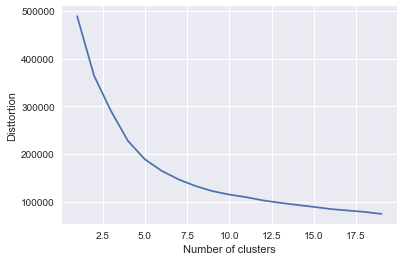

In [36]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

### クラスタリング結果をマージ、グルーピング

In [30]:
pd.DataFrame(label_data).info()
DI_Cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162919 entries, 0 to 162918
Data columns (total 1 columns):
cl_nm    162919 non-null int32
dtypes: int32(1)
memory usage: 636.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162919 entries, 6 to 1137845
Data columns (total 3 columns):
hour       162919 non-null int64
month      162919 non-null int64
weekday    162919 non-null int64
dtypes: int64(3)
memory usage: 10.0 MB


In [66]:
#DI_Clのindexがlabel_dataに対してとびとびになっていたのでそろえる
DI_Cl_1=DI_Cl.reset_index(drop=True)
DI_1=DI.reset_index(drop=True)

In [32]:
DI_Cl_1

,hour,month,weekday
0,0,10,4
1,0,10,4
2,0,10,4
3,0,10,4
4,10,10,4
5,10,10,4
6,10,10,4
7,10,10,4
8,11,10,4
9,11,10,4


In [69]:
merge_data = pd.concat([DI_Cl_1,pd.DataFrame(label_data)],axis=1)
merge_data1 = pd.concat([DI_1,pd.DataFrame(label_data)],axis=1)
merge_data.head()

,hour,month,weekday,cl_nm
0,0,10,4,2
1,0,10,4,2
2,0,10,4,2
3,0,10,4,2
4,10,10,4,2


In [34]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162919 entries, 0 to 162918
Data columns (total 4 columns):
hour       162919 non-null int64
month      162919 non-null int64
weekday    162919 non-null int64
cl_nm      162919 non-null int32
dtypes: int32(1), int64(3)
memory usage: 4.4 MB


### monthでヒートマップ

In [134]:
cluster_num_hour_cross_tb = pd.pivot_table(merge_data , index=['cl_nm'], columns=['hour'],aggfunc='count',fill_value = 0) 
a=cluster_num_hour_cross_tb.iloc[:,0:24]

In [135]:
cluster_num_hour_cross_tb
a

month                                                        ...         \
hour     0     1     2     3     4     5     6     7     8     9   ...     14   
cl_nm                                                              ...          
0         0     0     7    30    70   149   511   868  2115  2404  ...   3512   
1        61    50    53    49    98   216   609  1096  2672  2800  ...   3475   
2      4290  2295  1646  1348  1426  1474  1960  2338  4094  3692  ...      0   
3         0     0     0     0     0     0     0     0     0     0  ...   4377   

                                                             
hour     15    16    17    18    19    20    21    22    23  
cl_nm                                                        
0      3332  4044  3727  3281  2571  2029  1522  1311   946  
1      3168  3665  3627  3069  2393  1708  1362  1091   809  
2         0     0     0     0     0     0     0     0     0  
3      4015  5030  5001  4257  3787  3371  2980  2767  2401  

[4 rows x 24 columns]

In [136]:
a.iloc[0,:].sum()

44184

In [137]:
cluster_num_cnt_tb = pd.pivot_table(merge_data, values='hour', index=['cl_nm'],aggfunc=lambda x : len(x))
cluster_num_cnt_tb

,hour
cl_nm,
0,44184
1,43678
2,29002
3,46055


In [43]:
array=np.array([44184.0,43678.0,29002.0,46055.0])

In [44]:
b=a.div(array,axis=0)
b

month                                                              \
hour         0         1         2         3         4         5         6    
cl_nm                                                                         
0      0.000000  0.000000  0.000158  0.000679  0.001584  0.003372  0.011565   
1      0.001397  0.001145  0.001213  0.001122  0.002244  0.004945  0.013943   
2      0.147921  0.079132  0.056755  0.046480  0.049169  0.050824  0.067582   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                       ...                                   \
hour         7         8         9     ...           14        15        16   
cl_nm                                  ...                                    
0      0.019645  0.047868  0.054409    ...     0.079486  0.075412  0.091526   
1      0.025093  0.061175  0.064105    ...     0.079560  0.072531  0.083910   
2      0.080615  0.141163  0.127302    ...     0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000    ...     0.095039  0.087178  0.109217   

                                                                             
hour         17        18        19        20        21        22        23  
cl_nm                                                                        
0      0.084352  0.074258  0.058188  0.045922  0.034447  0.029671  0.021410  
1      0.083040  0.070264  0.054787  0.039104  0.031183  0.024978  0.018522  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.108588  0.092433  0.082228  0.073195  0.064705  0.060080  0.052133  

[4 rows x 24 columns]

In [49]:
for i in range(4):
    print(b.iloc[i,:].sum())

1.0
0.9999999999999998
1.0
0.9999999999999999


AttributeError: Unknown property fontsize

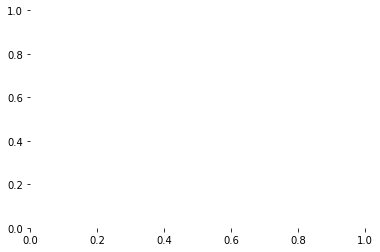

In [139]:
graph1=sns.heatmap(b            ,cmap='Blues')


### weekdayでヒートマップ

In [93]:
cluster_num_weekday_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['weekday'],aggfunc='count',fill_value = 0)
cluster_num_weekday_cross_tb
cluster_num_weekday_cross_tb.columns

MultiIndex(levels=[['BOROUGH', 'CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month'], [0, 1, 2, 3, 4, 5, 6]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10,

In [94]:
c=cluster_num_weekday_cross_tb.iloc[:,0:7]
d=c.div(array,axis=0)
d

In [95]:
d=c.div(array,axis=0)
d

BOROUGH                                                            
weekday         0         1         2         3         4         5         6
cl_nm                                                                        
0        0.186923  0.195229  0.177100  0.115630  0.016363  0.000000  0.000000
1        0.164705  0.170086  0.163583  0.131325  0.064632  0.005449  0.000000
2        0.021826  0.027481  0.064858  0.125681  0.178884  0.148507  0.118164
3        0.000000  0.000000  0.000000  0.053067  0.203148  0.226555  0.206253

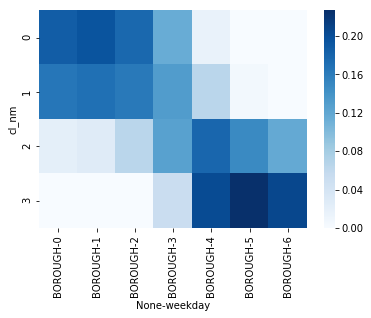

In [96]:
sns.heatmap(d          ,cmap='Blues')

### vehicle typeでヒートマップ

In [97]:
cluster_num_vehicle_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['VEHICLE TYPE'],aggfunc='count',fill_value = 0)
cluster_num_vehicle_cross_tb
cluster_num_vehicle_cross_tb.columns

MultiIndex(levels=[['BOROUGH', 'CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month', 'weekday'], ['BICYCLE', 'BUS', 'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'MOTORCYCLE', 'OTHER', 'Ohters', 'PASSENGER VEHICLE', 'PICK-UP TRUCK', 'SMALL COM VEH(4 TIRES) ', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'UNKNOWN', 'VAN']],
           labels=[[0, 0, 0, 0, 0, 0

In [101]:
e=cluster_num_vehicle_cross_tb.iloc[:,0:14]
f=e.div(array,axis=0)
f

BOROUGH                                           \
VEHICLE TYPE   BICYCLE       BUS LARGE COM VEH(6 OR MORE TIRES)   
cl_nm                                                             
0             0.004278  0.011158                       0.010207   
1             0.003640  0.010669                       0.009593   
2             0.004413  0.007586                       0.007620   
3             0.005146  0.006818                       0.004929   

                                                                              \
VEHICLE TYPE LIVERY VEHICLE MOTORCYCLE     OTHER    Ohters PASSENGER VEHICLE   
cl_nm                                                                          
0                  0.007899   0.002852  0.011588  0.009370          0.348814   
1                  0.007372   0.002038  0.013233  0.008975          0.373758   
2                  0.009103   0.002931  0.011758  0.009586          0.358837   
3                  0.006992   0.003648  0.008360  0.005407          0.379459   

                                                    \
VEHICLE TYPE PICK-UP TRUCK SMALL COM VEH(4 TIRES)    
cl_nm                                                
0                 0.014960                0.011045   
1                 0.014263                0.011814   
2                 0.014447                0.007413   
3                 0.010748                0.005711   

                                                                          
VEHICLE TYPE SPORT UTILITY / STATION WAGON      TAXI   UNKNOWN       VAN  
cl_nm                                                                     
0                                 0.192264  0.034696  0.010909  0.021207  
1                                 0.182105  0.031183  0.010555  0.020582  
2                                 0.174436  0.050445  0.011172  0.015654  
3                                 0.190555  0.037781  0.009120  0.014352

Text(0.5,15,'a')

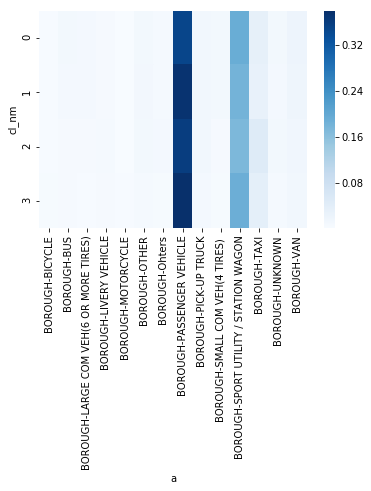

In [141]:
graph1=sns.heatmap(f,cmap='Blues')
graph1.set_xlabel("a")

In [104]:
cluster_num_borough_cross_tb= pd.pivot_table(merge_data1, index=['cl_nm'], columns=['BOROUGH'],aggfunc='count',fill_value = 0)
cluster_num_borough_cross_tb
cluster_num_borough_cross_tb.columns

MultiIndex(levels=[['CONTRIBUTING FACTOR', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'CROSS STREET NAME', 'DATETIME', 'LATITUDE', 'LOCATION', 'LONGITUDE', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'OFF STREET NAME', 'ON STREET NAME', 'UNIQUE KEY', 'VEHICLE TYPE', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ZIP CODE', 'hour', 'month', 'weekday'], ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11,

In [107]:
g=cluster_num_borough_cross_tb.iloc[:,0:5]
h=g.div(array,axis=0)
h

CONTRIBUTING FACTOR                                            
BOROUGH               BRONX  BROOKLYN MANHATTAN    QUEENS STATEN ISLAND
cl_nm                                                                  
0                  0.082654  0.171601  0.198239  0.205821      0.032930
1                  0.088260  0.179175  0.191469  0.202917      0.037960
2                  0.089373  0.171678  0.208055  0.188815      0.027481
3                  0.076582  0.169927  0.203908  0.206492      0.032114

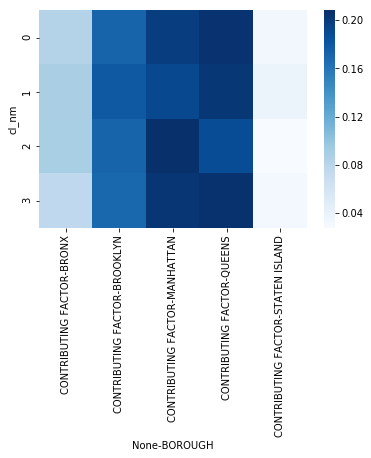

In [108]:
sns.heatmap(h,cmap='Blues')

In [72]:
merge_data_cluster0

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,month,weekday,CONTRIBUTING FACTOR,VEHICLE TYPE,cl_nm
167,2017-10-19 10:00:00,BRONX,10454,40.807700,-73.929550,"(40.8077, -73.92955)",BRUCKNER BOULEVARD,LINCOLN AVENUE,NaN,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
168,2017-10-19 10:00:00,BRONX,10462,40.844387,-73.862656,"(40.844387, -73.862656)",NaN,NaN,781 VANNEST AVENUE,0,...,NaN,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,MOTORCYCLE,0
169,2017-10-19 10:00:00,QUEENS,11434,40.682358,-73.767140,"(40.682358, -73.76714)",MERRICK BOULEVARD,125 AVENUE,NaN,0,...,NaN,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,PASSENGER VEHICLE,0
170,2017-10-19 10:10:00,NaN,NaN,40.747090,-73.763250,"(40.74709, -73.76325)",NaN,NaN,NaN,2,...,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
171,2017-10-19 10:15:00,NaN,NaN,40.662920,-73.989050,"(40.66292, -73.98905)",NaN,NaN,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
172,2017-10-19 10:21:00,QUEENS,11414,40.663067,-73.836880,"(40.663067, -73.83688)",97 STREET,157 AVENUE,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
173,2017-10-19 10:30:00,MANHATTAN,10021,40.769753,-73.954580,"(40.769753, -73.95458)",EAST 75 STREET,1 AVENUE,NaN,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
174,2017-10-19 10:30:00,NaN,NaN,40.528667,-74.231880,"(40.528667, -74.23188)",NaN,NaN,2 WAINWRIGHT AVENUE,0,...,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0
175,2017-10-19 10:30:00,NaN,NaN,40.662500,-73.804170,"(40.6625, -73.80417)",NaN,NaN,NaN,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,Ohters,0
176,2017-10-19 10:30:00,BROOKLYN,11215,40.668220,-73.973830,"(40.66822, -73.97383)",3 STREET,PROSPECT PARK WEST,NaN,1,...,BICYCLE,NaN,NaN,NaN,10,10,3,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,0


In [70]:
merge_data_cluster0 = merge_data1[merge_data1["cl_nm"]==0]
merge_data_cluster1 = merge_data1[merge_data1["cl_nm"]==1]
merge_data_cluster2 = merge_data1[merge_data1["cl_nm"]==2]
merge_data_cluster3 = merge_data1[merge_data1["cl_nm"]==3]
#merge_data_cluster4 = merge_data[merge_data["cl_nm"]==4]
#merge_data_cluster5 = merge_data[merge_data["cl_nm"]==5]

(40.450, 41)

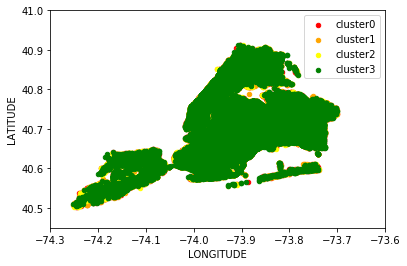

In [103]:
ax =merge_data_cluster0.plot.scatter(x='LONGITUDE', y='LATITUDE', color='red', label='cluster0');
merge_data_cluster1.plot.scatter(x='LONGITUDE', y='LATITUDE', color='orange', label='cluster1',ax=ax);
merge_data_cluster2.plot.scatter(x='LONGITUDE', y='LATITUDE', color='yellow', label='cluster2',ax=ax);
merge_data_cluster3.plot.scatter(x='LONGITUDE', y='LATITUDE', color='green', label='cluster3',ax=ax);
#merge_data_cluster4.plot.scatter(x='longitude', y='latitude', color='blue', label='cluster4',ax=ax);
#merge_data_cluster5.plot.scatter(x='longitude', y='latitude', color='purple', label='cluster5',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

## weekとlatitude-langitudeでクラスタリングすれば